# Functions for loading and creating visualisations

In [1]:
from ete3 import PhyloTree, TreeStyle, TextFace, add_face_to_node, SeqMotifFace, NodeStyle, faces, ImgFace, CircleFace, AttrFace

def load_tree(tree_path, aln_path=None):
    """
    Load a tree, associate an alignment with it if given
    """
    tree = PhyloTree(tree_path, alignment=aln_path, format=1, alg_format='fasta')
    return tree


def processable_node(node, highlight_nodes):
    """
    If there is still a node in highlight nodes that is a descendant of current node, we want to keep going
    """
    check = False
    for name in highlight_nodes:
        if name in [x.name for x in node.get_descendants()]:
           return True
        else:
           check = False
    return check
    
def highlight_tree_nodes(tree, highlight_nodes=['N0'], seq_pos = False):
    
    ts = TreeStyle()
    # disable default PhyloTree Layout
    ts.layout_fn = lambda x: True
    
    for n in tree.traverse():
        # If the node is either in highlight nodes or one of its descendents is
        if processable_node(n, highlight_nodes) or n.name in highlight_nodes:
            if n.name in highlight_nodes:
                col_name = n.name
                
                if not n.is_leaf():
                    N = AttrFace("name", fsize=14, fgcolor="black")
                    n.add_face(N, 1, position="branch-top")

                    nstyle = NodeStyle()
                    nstyle["shape"] = "sphere"
                    nstyle["fgcolor"] = 'blue'
                    nstyle["size"] = 10
                    nstyle["hz_line_type"] = 1
                    n.set_style(nstyle)
                if seq_pos:
                    S = SeqMotifFace(n.sequence[seq_pos[0] : seq_pos[1]], seq_format="seq", width=6)
                    n.add_face(S, 1, position="branch-bottom")

        else:
#             pass
            # We've reached a node which isn't one of the nodes to highlight and doesn't have a node to highlight as one of its descendents
            
            if n.name not in highlight_nodes:
                format_text = " extant sequence" if len(n) == 1 else " extant sequences"
                N = TextFace(" " + str(len(n)) + format_text, fsize=14, fgcolor="black")
                n.add_face(N, 1, position="branch-right")
                wid = max(len(n) * .3, 20)
                n.add_face(ImgFace("./triangle.png",width=wid), 0)
                n.img_style['draw_descendants'] = False
                n.name = ""
                
    return tree, ts   
    
def ancestral_trace(tree, seqs_to_trace_to, seq_pos):
    """
    Given a tree, extant sequences, and a position, perform an ancestal trace 
    """
    highlight_nodes = set()
    for seq_name in seqs_to_trace_to:
        node = tree&seq_name
        ancestor_list = node.get_ancestors()
        highlight_nodes.update(x.name for x in ancestor_list)
        highlight_nodes.add(seq_name)
    
    tree, ts = highlight_tree_nodes(tree, highlight_nodes, seq_pos)
    
    return tree, ts

# Example 1 - loading and highlighting specific nodes

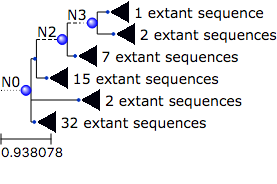

In [2]:
tree_path = "./copu_mischko_bacteria_rerun_with_hit_OKLR_reconstructed-tree_GRASP.nwk"
aln_path = "./copu_mischko_bacteria_rerun_with_hit_OKLR_joint-ancestors_GRASP_extants.fasta"
nodes = "N2 N3 N0"
out_path = "./output.png"

# Load tree
tree = load_tree(tree_path, aln_path)

# Get the nodes of interest
node_list = [x for x in nodes.split()]

# Highlight the tree nodes
tree, ts = highlight_tree_nodes(tree, node_list)
 
# Save the tree
tree.render(out_path, tree_style=ts, dpi=300)

# Display the tree in the notebook
tree.render("%%inline", tree_style=ts) 

# Example 2 - highlighting specific nodes and sequence content

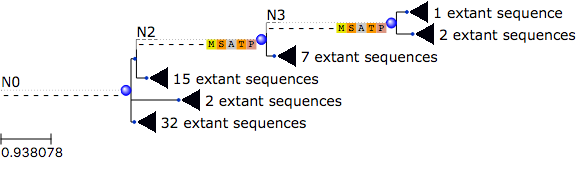

In [3]:
tree_path = "./copu_mischko_bacteria_rerun_with_hit_OKLR_reconstructed-tree_GRASP.nwk"
aln_path = "./copu_mischko_bacteria_rerun_with_hit_OKLR_joint-ancestors_GRASP_extants.fasta"
nodes = "N2 N3 N0"
out_path = "./output.png"

# Load tree
tree = load_tree(tree_path, aln_path)

# Get the nodes of interest
node_list = [x for x in nodes.split()]


seq_pos = (8, 20)

# Highlight the tree nodes
tree, ts = highlight_tree_nodes(tree, node_list, seq_pos)
 
# Save the tree
tree.render(out_path, tree_style=ts, dpi=300)

# Display the tree in the notebook
tree.render("%%inline", tree_style=ts) 

# Example 4 - ancestral trace to multiple sequences

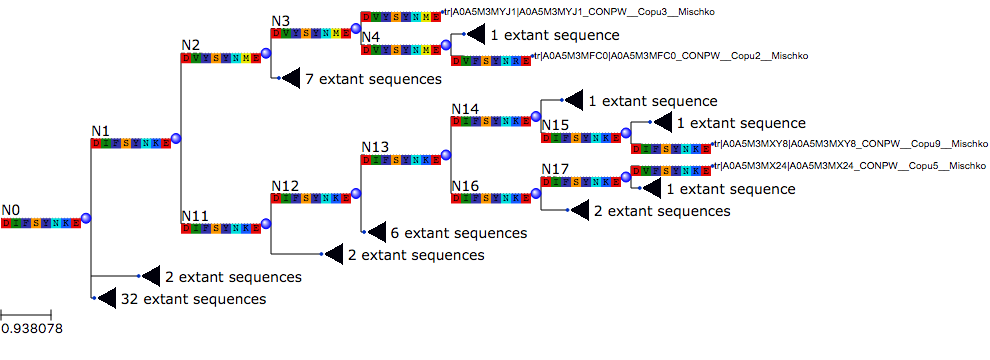

In [4]:
out_path = "./ancestral_trace.png"
seqs_to_trace_to = ['tr|A0A5M3MFC0|A0A5M3MFC0_CONPW__Copu2__Mischko',
                    'tr|A0A5M3MYJ1|A0A5M3MYJ1_CONPW__Copu3__Mischko',
                    'tr|A0A5M3MX24|A0A5M3MX24_CONPW__Copu5__Mischko',
                    'tr|A0A5M3MXY8|A0A5M3MXY8_CONPW__Copu9__Mischko'
                   ]

tree = load_tree(tree_path, aln_path)

seq_pos = (441, 449)


# Highlight the tree nodes
tree, ts = ancestral_trace(tree, seqs_to_trace_to, seq_pos)

# tree, ts = highlight_tree_nodes(tree, [seq_to_trace_to])
 
# Save the tree
tree.render(out_path, tree_style=ts, dpi=300)

# Display the tree in the notebook
tree.render("%%inline", tree_style=ts) 

# Example 5 - Retrieve a full sequence once you know the node name

In [11]:
tree = load_tree(tree_path, aln_path)
node_of_interest = 'N11'


for x in tree.iter_descendants():
    if x.name == node_of_interest:
        print (x.name)
        print (x.sequence)

N11
---------------MSATPA--------------TTTPSPQLNKFFSSSQPTHFILPDL-----LSI----CTFPLR---------------------------INPHCEAVAAESE-QWLLSLS---------PLSDPKR---------------------KKFNGC------KAGLLAAMCYPHADAEQLRV-CSDFMNLLFILDE-LSDD--------------------MNTKDARSLADVFMNALD-DPEA-------PRPAGA--SDYVEADDGLAAGKMT-RDFWERMIQTA--GPGC--YQRFIDTFESYFEAVAQEAEDRE------------------------------AGTIPDLESYIALRRDTSGVRPCFALIEYAL--GIDLPDEV---IEHPVIQAMSEATTDMVTWSN---------------DIFSYNKEQARG--------------------DT-HNMIAVLMHEH----GLDLQGAVDHVGEL-------FKQAIERFLEARAS-LP----SW--------G---P-EVD-------------------AEVQRYV-QGLQD--WIVGSLDWSFE-TQRYFGKDGPEVRKTRVVTLL----------------------------------------------PK-------RASS-------------------------------------------------------------
